# Lecture 6 - Generalization and Regularization

## Recap

Last class, we introduced experimental design. This is a crucial step of an ML model. It will affect all the subsequent choices we will make in the ML flowchart design.

As a quick recap:

1. **Experimental design** provides us with a scientific (unbiased) experimentation that will allow us to extract the most information from the data and draw conclusions from it.

2. Given a data set, we should always **partition the data set** into two sets: training set and test set; approximately 80\% and 20\% respectively.
    * The training set will *only* be used to train the model (designing features, parameters of the model, selecting a model, etc.)
    * The test set will *only* be used to assess the performance of the final trained model. This set should not be used in any step of training.

3. We should further split the training data into training and validation. We do this, because, in training, for every decision we make in the supervised learning algorithm flowchart, we want to evaluate how **generalizable** the model is. And so, for this, we use the validation set.
    * We will see today, exactly how to construct training and validations sets.
    
4. The **No Free Lunch** Theorem states that: for any learning algorithm, there is a dataset where it is very accurate and another dataset where it is very poor. When we say that a learning algorithm is good, we only quantify how well its inductive bias matches the properties of the data.

5. For every experiment, we have *uncontrollable* and *controllable* parameters. Different strategies of experimentation provides with scientific experimentation principles on how to perform the experiment:
    * We should **randomize** the selection of training and validation sets, so to minimize any bias and the results are independent.
    * We should **replicate** our experiment: the experiment should be run a number of times to average over the effect of uncontrollable factors and induced randomization.
    * We should **block** the *same* sets that were used for training and testing stages in order to fairly compare the performance between two models.
    
6. The set **guidelines for ML experiments** are summarized as follows:
    1. Understand the goal of the study
    2. Determine your evaluation metric(s)
    3. Determine what factors to vary and how to vary them
    4. Design your experiment (and get an estimate of how long it will take using a couple trial runs)
    5. Perform the experiment
    6. Analyze the result by performing statistical analysis
    7. Draw your conclusions based on your design and result

In [1]:
import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

from IPython.display import Image #module used to embed images,i.e. when you print PDF using Print Preview, images are included

In [ ]:
def PolynomialRegression(x,t,M):
    X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

def PolynomialRegression_test(x,M,w):
    X = np.array([x**m for m in range(M+1)]).T 
    y = X@w
    return y

def NoisySinusoidalData(N, a, b, gVar):
    x = np.linspace(a,b,N)
    noise = npr.normal(0,gVar,N) 
    t = np.sin(2*np.pi*x) + noise
    return x, t

In [ ]:
# Generate input samples and desired value

N = 40 
Ntest = 10 
a, b = [0,1] 
gVar_train = 0.5 
gVar_test = 1 
x1, t1 = NoisySinusoidalData(N, a, b, gVar_train) 
x2, t2 = NoisySinusoidalData(N, a, b, 0)
x3, t3 = NoisySinusoidalData(Ntest, a, b, gVar_test)

In [ ]:
# Model Order
M = 10

# Find the parameters that fit the noisy sinusoidal
w, y, error = PolynomialRegression(x1,t1,M) 

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

How do the weights look like?

As the model order increases, some of the weight values become very large! This is a good indication that we may be *memorizing* the training data.

In [ ]:
y_test = PolynomialRegression_test(x3, M, w)

plt.figure(figsize=(10,8))
plt.plot(x1,y,'r', label = 'Estimated Polynomial',linewidth=5)
plt.plot(x2,t2,'g', label = 'True Function',linewidth=5)
# plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x3,t3,'ro', label = 'Test Data')
plt.plot(x3,y_test,'-c*', label = 'Test Predictions', linewidth=5)
plt.legend()
plt.xlabel('Data Samples, x', fontsize=15)
plt.ylabel('Desired Values, t', fontsize=15);

In fact, we try and estimate the value for $x$ *far off* from the interval $[0,1]$, the model will not provide a good estimate:

In [ ]:
x4, t4 = NoisySinusoidalData(10, 0.5, 1.5, 0.1)
x2, t2 = NoisySinusoidalData(N, 0, 1.5, 0)

plt.plot(x1, t1, 'bo', label = 'Training Data')
plt.plot(x2, t2, 'g', label = 'True Sinusoidal')
plt.plot(x4, t4, 'ro', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

In [ ]:
M = 4

w, y, error = PolynomialRegression(x1,t1,M)
y_test = PolynomialRegression_test(x4, M, w)

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x4, t4, 'ro', label = 'Test Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x4,y_test,'-c*', label = 'Test Predictions', linewidth=5)
plt.plot(x2,t2,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

In Machine Learning, we want our supervised learning model to be able to *generalize* knowledge acquired from the training stage to new unknown data. So we don't want to train the model such that it *memorizes* the training samples, nor we want to make the model so simple that is simply doesn't work. These two situations are known as **overfitting** and **underfitting** respectively.

## Overfitting & Underfitting

After selecting our *linear model*, the only parameter we can *control* is the *model order* $M$.

* As $M$ increases, there are more parameters (more elements in the vector $\mathbf{w}$) to learn and, so, the model becomes more complex.

* The order $M$ regulates the model *complexity*.
    * In a Polynomial regresssion it also controls the richness of the feature space. 

As a model that is *complex*, it is more likely to *overfit* or *overtrain*.
* This essentially means it may "memorize" the input training data,
* Including all of the training data's noise!

<div class="alert alert-info">
    <b>Overfitting</b> 

In model fitting, a model is said to have **overfit** to the training data, if it is *not* able to *generalize* to new and unknown data. We can observe this effect as the training error is small but the error in the test data is very large.

In other words, overfitting means that the *true* underlying model of the data is not estimated/learned properly, instead the model returned a poor representation that memorized meaningless noise in the data.
</div>

<div class="alert alert-info">
    <b>Underfitting</b> 

In model fitting, a model is said to have **underfit** if the error in both in training and test data sets are still decreasing. 

An underfit model is not complex enough to model all the characteristics in the data.
</div>

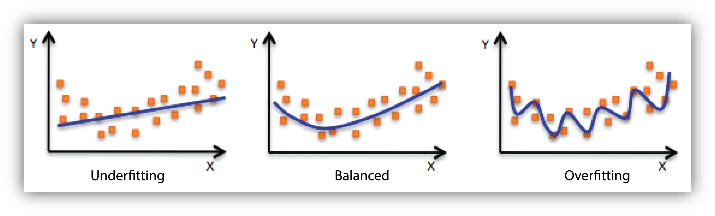

In [2]:
Image('figures/fits.png',width=1000)

## How to avoid overfitting?

Suppose you have $N$ data points and you are trying to estimate $M$ coefficients. In other words, you are solving a set of $M$ equations with $N$ variables. 

**1. What happens when we have more unknowns than known variables, i.e., $M > N$?** 

In other words, what happens when the data matrix, $\mathbf{X}^T\mathbf{X}$, is **not** full rank?

* Review *span* and *rank*: ["Inverse matrices, column space and null space", YouTube 3Blue1Brown video](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)

**2. How can you avoid overfitting?**

* **More data**: As you have more and more data, it becomes more and more difficult to "memorize" the data and its noise. Often, more data translates to the ability to use a more complex model and avoid overfitting. Adding more data, also allows the data matrix, $\mathbf{X}^T\mathbf{X}$, to *explain* the entire $M$-dimensional space and prevent it from becoming *singular*.
    * However, generally, you need exponentially more data with increases to model complexity.  So, there is a limit to how much this helps. If you have a very complex model, you need a huge training data set. 
    * (Note: A matrix is said to be *singular* if its determinant is equal to zero, this means it is **not** invertible.)
* **Cross-validation**: tests the model's ability to predict new data that was not used in estimating the model, in order to flag problems like *overfitting* or *selection bias* and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).
* **Regularization**: add a penalty term to the error function to discourage learning a more complex model by forcing the model parameters to be small.

## Cross-Validation

<div class="alert alert-info">
    <b>$k$-fold Cross-Validation</b> 

The goal of **cross-validation** is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like *overfitting* or *selection bias* and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

The technique of **$k$-fold cross-validation**, illustrated below for the case of $k = 4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the S runs are then averaged.
</div>

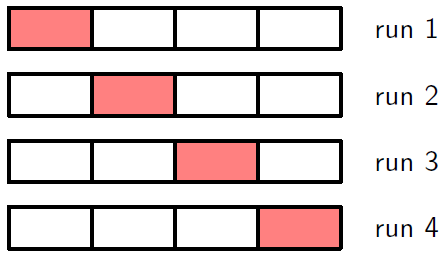

In [3]:
Image('figures/Kfold CV.png',width=400)

## Regularization

<div class="alert alert-info">
    <b>Regularization</b> 

**Regularization** contrains/*regularizes* or shrinks the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, so to avoid the risk of overfitting.

$$J_W(\mathbf{w}) = \frac{1}{2}\mathbf{w}^T\mathbf{w} = \left\Vert\mathbf{w}\right\Vert_2^2$$

where

$$J(\mathbf{w}) = J_D(\mathbf{w}) + \lambda J_W(\mathbf{w}) = \frac{1}{2} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2 + \lambda\frac{1}{2}\left\Vert\mathbf{w}\right\Vert_2^2$$

where $\lambda$ is the regularization coefficient that controls the relative importance of the data-dependent error $J_D(\mathbf{w})$ and the regularization term $J_W(\mathbf{w})$.
</div>

* This particular choice of regularizer is known in the machine learning literature as **weight decay** or **ridge** because in sequential learning algorithms, it encourages weight values to decay towards zero, unless supported by the data.

* It has the advantage that the error function remains a quadratic function of $\mathbf{w}$, and so its exact minimizer can be found in closed form.

* A more general regularizer is sometimes used, for which the regularized error takes the form:

$$J(\mathbf{w}) = \frac{1}{2} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2 + \lambda\frac{1}{2}\left|\mathbf{w}\right|^q$$

where $q=2$ corresponds to the quadratic regularizer. 

* The case of $q = 1$ is known as the **lasso** regularizer. It has the property that if $\lambda$ is sufficiently large, some of the coefficients $w_j$ are driven to zero, leading to a *sparse* model in which the corresponding basis functions play no role.

In [ ]:
xrange = np.linspace(-2,2,1000)

plt.plot(xrange,xrange**2, label = 'Ridge Regressor')
plt.plot(xrange,np.abs(xrange), label = 'Lasso Regressor')
plt.legend();

**Observations:**

* Ridge regularizer:
    * prefers to weight parameter elements to be non-zero
    * is highly affected by outliers

* Lasso regularizer:
    * promotes sparsity
    * it is not as affected by outliers

<div class="alert alert-info">
    <b>Regularized Least Squares</b> 

We fit the linear regression model such that the *regularized* objective function $J(\mathbf{w})$ is minimized:

$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$
    
where   
    
\begin{align} 
J(\mathbf{w}) &= J_D(\mathbf{w}) + \lambda J_W(\mathbf{w}) \\
&= \frac{1}{N} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2 + \lambda\left\Vert\mathbf{w}\right\Vert_2^2
\end{align}

This is often referred to as the **ridge regression**. The optimal solution $\mathbf{w}^*$ is:

$$\mathbf{w}^* = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

where $\mathbf{I}$ is an identity matrix of size $(M+1)\times (M+1)$.
</div>

* We are **diagonally loading** the matrix $\mathbf{X}^T\mathbf{X}$ with the regularizer term $\lambda$.
* This is "filling" the feature space such that the matrix $\mathbf{X}^T\mathbf{X}$ becomes full rank.
* What happens when $\lambda \rightarrow \infty$?

* In code, how would you change the function ```PolynomialRegression``` created above to include the regularization term?

In [ ]:
N = 40
Ntest = 10 
a, b = [0,1] 
gVar_train = 0.5 
gVar_test = 1 
x1, t1 = NoisySinusoidalData(N, a, b, gVar_train) 
x2, t2 = NoisySinusoidalData(N, a, b, 0)
x3, t3 = NoisySinusoidalData(Ntest, a, b, gVar_test)

In [ ]:
M = 10
lam = 0.000001

_, y, _ = PolynomialRegression(x1,t1,M) 
_, yreg, _ = PolynomialRegression_reg(x1,t1,M,lam) 

fig=plt.figure(figsize=(10,8))
plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r',linewidth=5, label = 'Estimated Polynomial')
plt.plot(x1,yreg,'c',linewidth=5, label = 'Estimated Polynomial w/ Reg.')
plt.plot(x2,t2,'g',linewidth=5, label = 'True Function')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x', fontsize=20)
plt.ylabel('Desired Values, t', fontsize=20);

* What are the parameters we can control now? <!--Model order $M$ and regularizer weight $\lambda$ -->

**<font color=red>Important:</font> In practice, when computing $(\mathbf{X}^T\mathbf{X})^{-1}$, if you receive an *error: matrix is singular*, what do you do?**

## Basis Functions

So far, we have assumed that we have form a **feature matrix** $\mathbf{X}$ of dimensions $N \times (M+1)$, where $N$ is the number of samples and $M$ the number of coefficients.

* In Polynomial Regression, we constructed this matrix with a polynomial representation of each data sample:

$$\phi(x_i) = [x_i^0, x_i^1, \cdots, x_i^M]^T$$

In practice, we can use other types of features. But, from a software implementation point-of-view, regardless of the features used, we always want to have them in a tidy feature matrix $\mathbf{X}$:

$$\mathbf{X} =\left[\begin{array}{c} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{array}\right]  = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right] \in \mathbb{R}^{N\times (M+1)}$$

* In mathematics, the polynomial feature representation that we have used is called a **polynomial basis function** and is a basis of a polynomial ring.

* We can also implement the **Linear Regression** model using other feature representations, also called **basis functions** $\phi(\mathbf{x})$. 

    * **Assumption:** we are assuming that true *unknown* function $f(x)$ can be modeled by at least one of the functions $\phi(\mathbf{x})$ that can be represented by a linear combination of the basis functions, i.e., by one function in the function class under consideration.
    
    * If we include **too few** basis functions or unsuitable basis functions, we might not be able to model the true dependency. Similarly to polynomial features, the more we added, the better fit we have to out training data.
    
    * If we include **too many** basis functions, we need many data points to fit all the unknown parameters.
        * There are special function space (Reproducing Kernel Hilbert Space or RKHS) where we can have an *infinite* number of basis functions (called kernels) and still have good generalization.
    
    * What we control? Which basis functions to use, how many to use, and any other parameters they have.

Some examples include:

1. **Radial Basis Functions**

Another class of basis functions are radial basis functions (RBF). Typical representatives are Gaussian basis functions:

$$\phi_j(x) = \exp\left\{-\frac{(x-\mu_j)^2)}{2s_j^2}\right\}$$

In [ ]:
M = 10
m = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
s = [0.05]*10

fig = plt.figure(figsize=(10,8))
plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x2,t2,'g',linewidth=5, label = 'True Function')
for i in range(M):
    plt.plot(x1, RBF(x1,m[i],s[i]));

Given these basis functions, we need to:
1. compute the weight value that each one has in representing the underlying function $f(x)$
2. estimate the parameters of each basis function, in particular, the mean $\mu$ and standard deviation $\sigma$ for each Gaussian function.

We will see exactly how to do this when we study **Gaussian Mixture Models (GMMs)**, but we are not quite ready yet...

2. **Fourier Basis functions**

3. **Wavelet Basis functions**

4. and many others

## The Bias-Variance Trade-Off

Regardless of the form and number of the basis functions, we still face the problem of **overfitting**. In fact, this is true for any ML model.

The problem of searching for *optimal* model complexity has been extensively studied; in fact, we are *simply* searching for a level of complexity that fits the data *well* yet *not too well*. This phenomenon can be summarized by the **bias-variance trade-off** of complexity.

<div class="alert alert-info">
    <b>The Bias-Variance Trade-Off</b> 

The bias-variance trade-off is a way of analyzing a learning algorithm's expected generalization error with respect to a particular problem as a sum of three terms, the bias, variance, and a quantity called the irreducible error, resulting from noise in the problem itself.
</div>

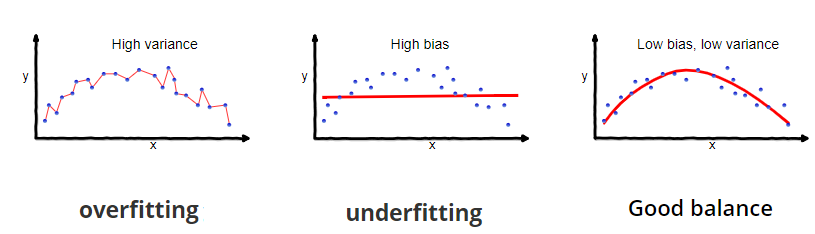

In [4]:
Image('figures/BiasvsVariance.png',width=800)

Consider the cost function:

$$J(\mathbf{x},\mathbf{w}) = \frac{1}{N} \Vert \mathbf{t} - \mathbf{y}\Vert_2^2$$

where $\mathbf{y} = \sum_{j=0}^{M} w_j\phi_j(\mathbf{x})$

We can model each $J$ as a random variable, and so its expected value, over some data set $D$, is given by:

\begin{align}
E\left[J(\mathbf{x},\mathbf{w})\right] &= E\left[\frac{1}{N} \Vert \mathbf{t} - \mathbf{y}\Vert_2^2\right] \\
&=E\left[(\mathbf{t} - \mathbf{y})^2\right]
\end{align}

where $\mathbf{y}$ is the model and $\mathbf{t}$ is the desired response. For the experimental design section, we learned that this quantity dependent on the particular data set $D$. And so, we can take its average over the ensemble of data sets. If we add and subtract the quantity $E_D[\mathbf{y}]$.

* In practice we really only have access to $E_D[\mathbf{y}]$
* But $\mathbf{y}$ here, is simply representing the model *if* we had an *infinite* amount of data and could effectively represent it.

\begin{align}
E\left[(\mathbf{t} - \mathbf{y})^2\right] &= E\left[(\mathbf{t} - E_D[\mathbf{y}] + E_D[\mathbf{y}] - \mathbf{y})^2\right]\\
&= E\left[(\mathbf{t} - E_D[\mathbf{y}])^2\right] + E\left[(E_D[\mathbf{y}] - \mathbf{y})^2\right] + E\left[2(\mathbf{t} - E_D[\mathbf{y}])(E_D[\mathbf{y}] - \mathbf{y})\right]\\
&= \text{variance } +  \text{bias } +  \text{irreducible error} 
\end{align}